## Modelos de regresión lineal
### Modelos con datos simulados
* El modelo de regresión lineal busca esto:  y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 6 + 2.0 * x + e
* E estará distribuída según una N(0, 0.8)

In [2]:
import pandas as pd
import numpy as np

In [112]:
x = 1.5 + 2.5 * np.random.randn(100)

In [113]:
res = 0 + 0.8 * np.random.randn(100)

In [146]:
# Con mi fecha de cumpleaños va genial y_pred = 6 + 2.0 * x
y_pred = 9 + 0.2 * x

In [115]:
y_act = 9 + 0.2 * x + res

In [116]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [117]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_act":y_act_list,
        "y_pred":y_pred_list
    }
)

In [118]:
data

,x,y_act,y_pred
0,-0.542713,7.951009,8.891457
1,2.497915,10.268881,9.499583
2,1.536365,9.203378,9.307273
3,-0.146606,8.924398,8.970679
4,4.004431,8.797511,9.800886
...,...,...,...
95,0.116066,8.835359,9.023213
96,6.508673,9.210932,10.301735
97,-0.023423,9.877307,8.995315
98,-2.774201,9.070884,8.445160


In [119]:
import matplotlib.pyplot as plt

In [144]:
y_mean = [ np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual VS predicción')

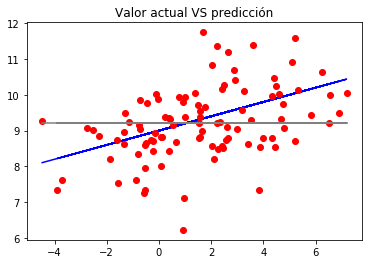

In [121]:
%matplotlib inline
plt.plot(x,y_pred,"b")
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean,"grey")
plt.title("Valor actual VS predicción")

In [122]:
data["SSR"] = (data["y_pred"]-np.mean(y_act))**2
data["SSD"] = (data["y_pred"]-data["y_act"])**2
data["SST"] = (data["y_act"]-np.mean(y_act))**2

In [123]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,-0.542713,7.951009,8.891457,0.096150,0.884443,1.563821
1,2.497915,10.268881,9.499583,0.088831,0.591819,1.139222
2,1.536365,9.203378,9.307273,0.011180,0.010794,0.000003
3,-0.146606,8.924398,8.970679,0.053296,0.002142,0.076806
4,4.004431,8.797511,9.800886,0.359219,1.006761,0.163237


In [124]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [125]:
SSR

26.551797387200118

In [126]:
SSD

84.70961577242073

In [127]:
SST

100.3091768260676

In [128]:
SSR+SSD

111.26141315962084

In [129]:
R2 = SSR/SST

In [130]:
R2

0.2646995840992689

(array([ 2.,  4.,  8., 20., 23., 19., 19.,  2.,  2.,  1.]),
 array([-2.40943487, -1.8726936 , -1.33595234, -0.79921107, -0.26246981,
         0.27427146,  0.81101272,  1.34775399,  1.88449525,  2.42123651,
         2.95797778]),
 <a list of 10 Patch objects>)

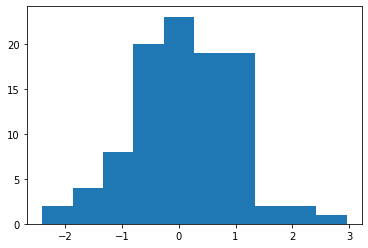

In [131]:
plt.hist(data["y_pred"]-data["y_act"])

### Obteniendo la recta de regresión
* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_n - b * x_m

In [132]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_act"])
x_mean,y_mean

(1.6004425212378586, 9.201537367537394)

In [133]:
data["beta_n"] = (data["x"] - x_mean)*(data["y_act"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [134]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [135]:
alpha = y_mean - beta * x_mean

In [136]:
alpha, beta

(8.933264639879948, 0.16762409402241535)

In [137]:
#El modelo lineal obtenido por regresión es:
y = 5.91440960056325 + 1.9995644692496597 * x

In [138]:
data["y_model"] = alpha + beta *  data["x"]

In [139]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,-0.542713,7.951009,8.891457,0.096150,0.884443,1.563821,2.680077,4.593117,8.842293
1,2.497915,10.268881,9.499583,0.088831,0.591819,1.139222,0.957911,0.805457,9.351975
2,1.536365,9.203378,9.307273,0.011180,0.010794,0.000003,-0.000118,0.004106,9.190796
3,-0.146606,8.924398,8.970679,0.053296,0.002142,0.076806,0.484176,3.052179,8.908690
4,4.004431,8.797511,9.800886,0.359219,1.006761,0.163237,-0.971274,5.779159,9.604504


In [140]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_act"])**2)
SST = sum((data["y_act"]-y_mean)**2)

In [141]:
SSR, SSD, SST

(17.6639581761527, 82.64521864991495, 100.3091768260676)

In [142]:
R2 = SSR /SST

In [143]:
R2

0.17609513640792157

Text(0.5, 1.0, 'Valor actual VS predicción')

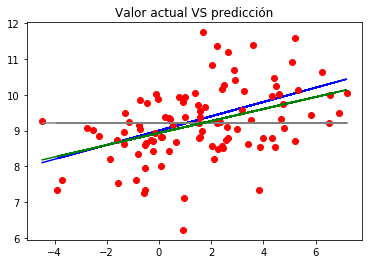

In [145]:
%matplotlib inline
plt.plot(data["x"],y_pred,"b")
plt.plot(data["x"],y_act,"ro")
plt.plot(data["x"],y_mean,"grey")
plt.plot(data["x"], data["y_model"],"g")
plt.title("Valor actual VS predicción")